In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score



# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Basic preprocessing
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [5]:
# Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=None, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {bagging_accuracy:.4f}")
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print("Summary of Ensemble Techniques:")
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.8101
Random Forest Accuracy: 0.8212
Gradient Boosting Accuracy: 0.8101
Summary of Ensemble Techniques:
Bagging Classifier Accuracy: 0.8101
Random Forest Classifier Accuracy: 0.8212
Gradient Boosting Classifier Accuracy: 0.8101


<ipython-input-8-5f61d4e5bd13>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


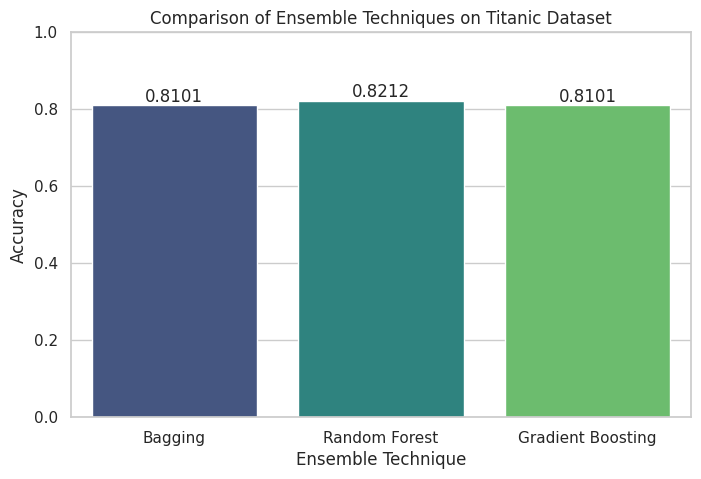

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensemble Techniques and their Accuracy
models = ['Bagging', 'Random Forest', 'Gradient Boosting']
accuracies = [bagging_accuracy, rf_accuracy, gb_accuracy]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plot the accuracies
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title('Comparison of Ensemble Techniques on Titanic Dataset')
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Annotate the bars with accuracy values
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.4f}', ha='center', fontsize=12)

plt.show()
